## Problem Framing
What is **Churn** : Customer churn = customers who stop using the service or cancel their subscription within a given period.

Why **churn** matters

- Acquiring customers is expensive
- Retention is cheaper than acquisition
- High churn = revenue leakage
- Predicting churn allows proactive intervention

In [2]:
#importing the models
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading our data
df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn 2.csv', encoding='latin1') 

## Data Cleaning and Preparation

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#features of dataset
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:
#checking the numbers of values we have in each column
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [8]:
#checking for null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Dataset shape
df.shape

(7043, 21)

In [10]:
# Summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 1) About 16% of customers are senior citizens 
Senior citizens may have:
- Different price sensitivity
- Lower tolerance for poor service
- Higher support needs

## 2) Max tenure of 72 months indicates long-term loyal customers
The average customer stays a bit over 2.5 years, 
The median (29) is close to the mean, relatively balanced distribution,
Tenure = 0 confirms the presence of new customers

Why this matters for churn:
- New customers typically churn more
- Long-tenure customers are usually more stable
- Tenure is almost always one of the strongest churn predictors

## 3) Customers paying more may:
- Expect higher quality
- Be more sensitive to poor service
- Churn if value isn’t perceived

In [12]:
# fix TotalCharges data type
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df["TotalCharges"].isnull().sum()

np.int64(11)

In [13]:
# Customers with missing TotalCharges typically have very low tenure (new customers)
df[df["TotalCharges"].isnull()][["tenure", "MonthlyCharges", "TotalCharges"]].head()

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN


In [14]:
# we fill missing values with 0 since missing TotalCharges corresponds to new customers
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [15]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
#convert Churn to binary
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [17]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Summary of our Data Cleaning
Converted TotalCharges from object to numeric, after conversion we noticed we have 11 missing values in TotalCharges. I handled the missing values based on business context. Proceeded to encoded Churn as a binary target variable.

 - After all this our data set is Clean, Consistent and read for EDA

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the dataset deeply before building any model. It lets us:- 
Spot patterns and trend- s
Detect outliers and skewed distributio- ns
Understand which features are import- ant
Form data-driven hypothesesheses

**Question** Do churned customers behave differently from retained customers?

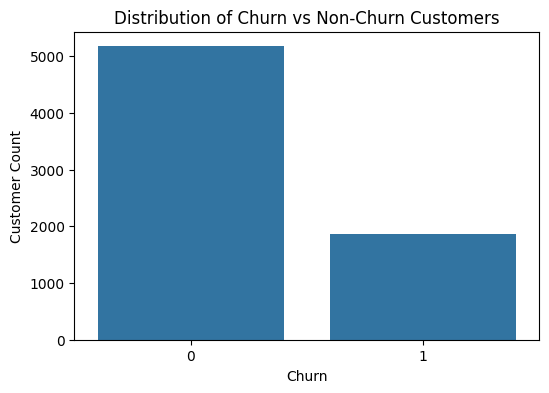

In [23]:
#A count plot of churn to understand class balance
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Distribution of Churn vs Non-Churn Customers")
plt.xlabel("Churn")
plt.ylabel("Customer Count")
plt.show()

**Answer** Confirms churn is a minority class

Churned customers show:
- Significantly lower tenure
- Generally higher monthly charges
- Higher likelihood of being on month-to-month contracts

**Question 2** Are new customers more likely to churn?

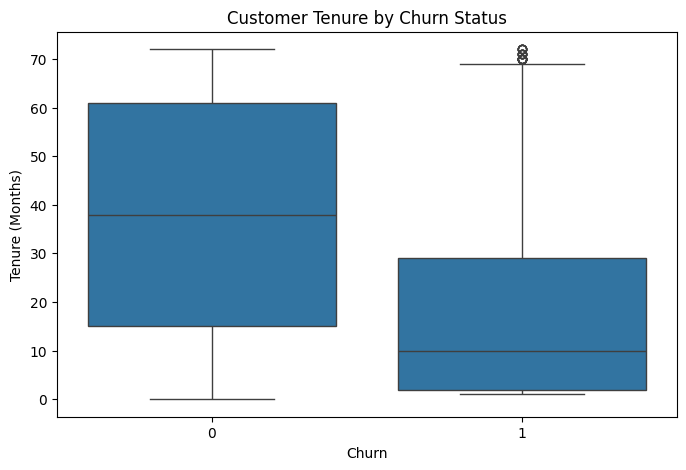

In [26]:
#A box plot of tenure vs churn (using boxplot to plot our numerical values)
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Customer Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

**Answer** Yes. Customers with low tenure are much more likely to churn.

This indicates that:
- The early customer lifecycle is the most vulnerable
- Poor onboarding or unmet expectations may drive early churn

**Question 3** Does pricing influence churn behavior?

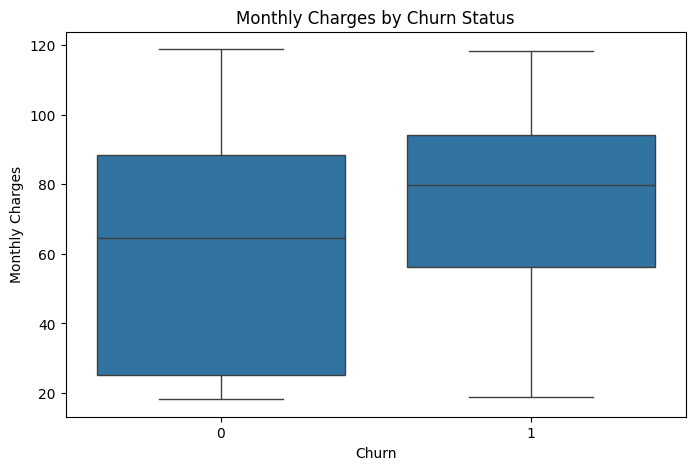

In [29]:
# A boxplot of monthly charges vs churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

**Answer** Yes. Churned customers tend to have higher monthly charges.

This suggests:
- High-paying customers may not perceive sufficient value
- Premium users likely have higher expectations and lower tolerance for issues

**Question 4** How does contract type affect churn?

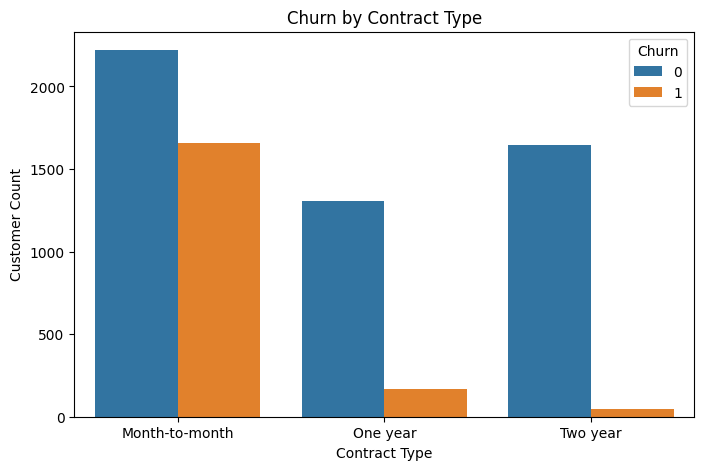

In [32]:
# A count plot of contract type split by churn(use countplot for our categorical values)
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.show()

**ANswer** Month-to-month contracts have the highest churn rates, while one-year and two-year contracts have significantly lower churn.

This indicates:
- Commitment reduces churn
- Customers with flexibility are more likely to leave

**Question 5** Do different internet service types have different churn patterns?

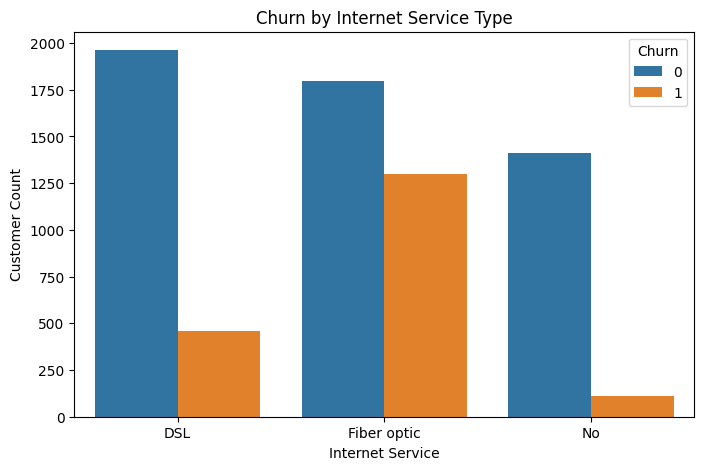

In [35]:
# A count plot of internet service vs churn
plt.figure(figsize=(8,5))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Customer Count")
plt.show()

**Answer** Yes. Fiber optic customers churn more than DSL customers.

This could be due to:
- Higher pricing
- Higher performance expectations
- Greater sensitivity to service quality issues

**Question 6** Does payment method influence churn?

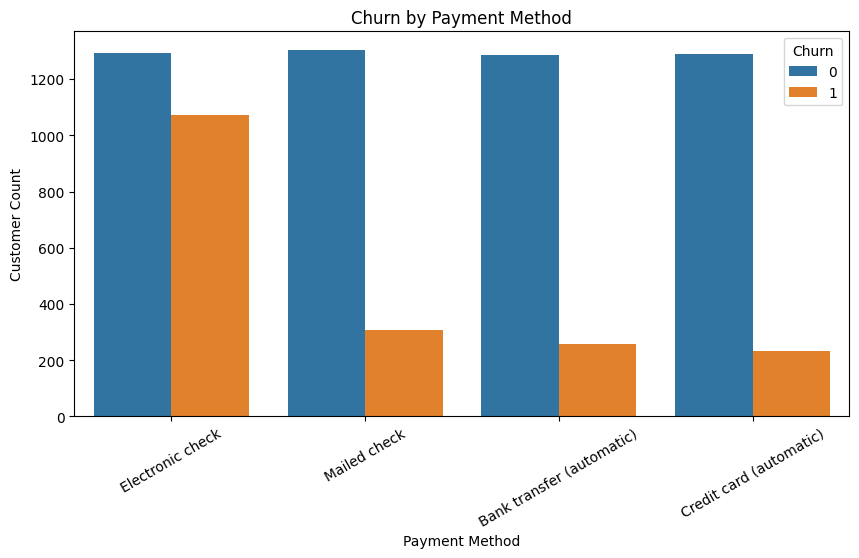

In [38]:
# A count plot of payment method vs churn
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Customer Count")
plt.xticks(rotation=30)
plt.show()

**Answer** Customers using electronic checks have higher churn compared to other payment methods.

This suggests:
- Payment friction increases churn risk
- Convenience and automation improve retention

**Question** Does senior citizen status impact churn?

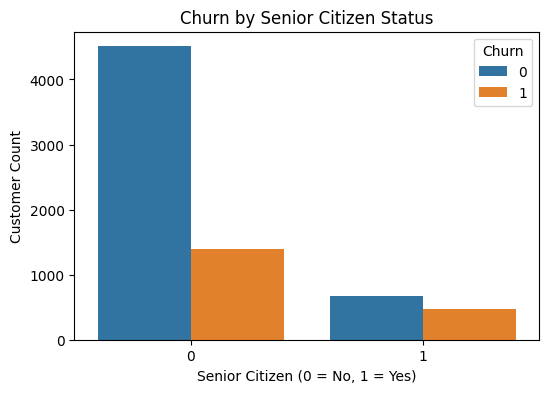

In [41]:
# A count plot of senior citizen vs churn
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()

**Answer** Senior citizens show different churn behavior compared to non-senior customers, indicating demographic factors may influence retention and service needs.

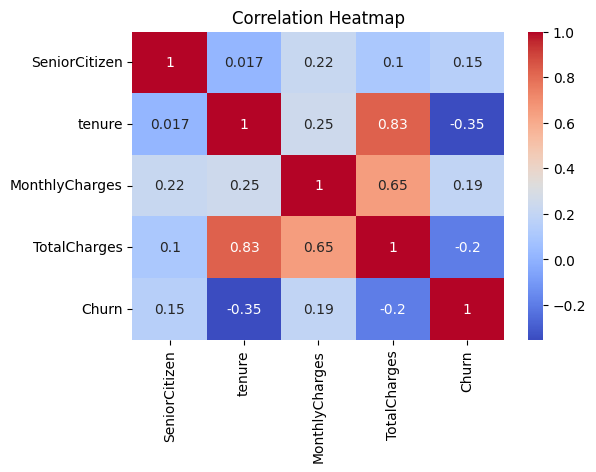

In [209]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Key Observations** 

**1️) Tenure Is the Strongest Indicator of Churn**
- Customers who churn tend to have significantly lower tenure
- Long-tenure customers are much more likely to remain with the company
- Churn risk is highest during the early stages of the customer lifecycle

**2️) Pricing and Perceived Value Influence Churn**
- Churned customers generally have higher monthly charges
- This suggests that customers paying more are:
- More sensitive to service quality
- More likely to churn if perceived value does not meet expectations

**3️) Contract Type Has a Major Impact on Retention**
- Month-to-month contracts show the highest churn rates
- One-year and two-year contracts significantly reduce churn
- Longer contracts act as a retention mechanism by increasing commitment

**4️) Service Type Affects Churn Behavior**
- Customers using fiber optic internet churn more than those using DSL
This may be driven by:
- Higher pricing
- Higher performance expectations
- Greater dissatisfaction when issues occur

**5️) Payment Method Creates Friction**
- Customers using electronic checks have higher churn rates
- Customers on automatic payment methods churn less
- Reducing payment friction appears to improve customer retention

**6) Demographic Factors Play a Role**
-Senior citizens exhibit different churn behavior compared to non-senior customers
-This indicates that demographic characteristics may influence service expectations and support needs

**Conclusion**

The exploratory data analysis reveals clear and consistent behavioral differences between churned and retained customers. Churn is strongly associated with low customer tenure, higher monthly charges, flexible contract types, and payment friction.

These findings suggest that churn is driven not by a single factor, but by a combination of early disengagement, pricing sensitivity, and lack of long-term commitment. Addressing churn effectively will require targeted retention strategies focused on onboarding, value communication, contract incentives, and customer convenienc.


### FEATURE ENGINEERING

In [46]:
# Get the max tenure
print(df['tenure'].max())

72


In [47]:
# Create tenure groups
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12 months", "12-24 months", "24-48 months", "48+ months"],
    include_lowest=True
)

In [48]:
#Someone using internet + TV + security + support = harder to leave
# We counted how many services each customer uses. “Higher number = more involved customer”
service_columns = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

df["num_services"] = df[service_columns].apply(
    lambda x: (x == "Yes").sum(), axis=1
)

In [49]:
#find out if a customer is paying more than average, This turns pricing into a simple risk signal.
high_charge_threshold = df["MonthlyCharges"].median()
df["high_monthly_charge"] = (df["MonthlyCharges"] > high_charge_threshold).astype(int)

In [50]:
#We turned contract type into: 1 = long-term contract 0 = flexible contract
#This tells the model: “This customer is locked in” or “This customer can leave anytime”
df["long_term_contract"] = df["Contract"].apply(
    lambda x: 1 if x in ["One year", "Two year"] else 0
)

In [51]:
# created a simple flag:1 = automatic payment, 0 = manual payment
#This captures convenience, which strongly affects retention.
df["auto_payment"] = df["PaymentMethod"].apply(
    lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0
)

In [52]:
#fiber users pay more, expect better performance so we flagged fiber users
#This tells the model: “This customer belongs to a high-expectation group.
df["fiber_optic_user"] = (df["InternetService"] == "Fiber optic").astype(int)

In [53]:
#Different age groups: Use services differently, Have different expectations
# We simply made sure it’s numeric: Now the model can detect: “This demographic behaves differently.
df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)

In [54]:
df.drop("customerID", axis=1, inplace=True)

In [55]:
#Encoding categorical values
df_encoded = pd.get_dummies(
    df,
    columns=[
        "gender", "Partner", "Dependents", "PhoneService",
        "MultipleLines", "InternetService", "OnlineSecurity",
        "OnlineBackup", "DeviceProtection", "TechSupport",
        "StreamingTV", "StreamingMovies", "Contract",
        "PaperlessBilling", "PaymentMethod", "tenure_group"
    ],
    drop_first=True
)

In [56]:
df_encoded.shape

(7043, 39)

In [57]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,num_services,high_monthly_charge,long_term_contract,auto_payment,fiber_optic_user,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_12-24 months,tenure_group_24-48 months,tenure_group_48+ months
0,0,1,29.85,29.85,0,1,0,0,0,0,...,False,False,False,True,False,True,False,False,False,False
1,0,34,56.95,1889.50,0,2,0,1,0,0,...,False,True,False,False,False,False,True,False,True,False
2,0,2,53.85,108.15,1,2,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
3,0,45,42.30,1840.75,0,3,0,1,1,0,...,False,True,False,False,False,False,False,False,True,False
4,0,2,70.70,151.65,1,0,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False


### Feature Engineering Summary

Based on insights from EDA, several new features were engineered to better capture
customer behavior and churn risk. These include tenure lifecycle groups, service
adoption counts, pricing sensitivity indicators, contract commitment flags, and
payment friction indicators.

These engineered features translate business insights into measurable signals,
improving the model’s ability to identify customers at risk of curning.


### Churn Modelling
**Train-Test-Split**

Before building our model, we need to split the data into training and testing sets. The model will learn patterns from the training set, and we’ll use the testing set to check how well it performs on unseen data. . Let’s go with 80% training and 20% test

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [61]:
X = df_encoded.drop( 'Churn', axis=1)
y = df_encoded['Churn']

In [62]:
#stratify=y : Keeps churn ratio consistent and Prevents biased evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**LOGISTIC REGRESSION**

In [64]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [65]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

In [66]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[932, 103],
       [182, 192]])

In [67]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [68]:
#ROC-AUC Score
roc_auc_score(y_test, y_pred_proba)

0.8426670800072334

**RANDOM FOREST**

In [121]:
rf_model = RandomForestClassifier(
    n_estimators=10,
    random_state=1
)

rf_model.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
#prediction
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [119]:
print(classification_report(y_test, rf_pred))
roc_auc_score(y_test, rf_pred_proba)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



0.8247888088041543

In [127]:
# Random Forest Parameter Tuning
scores = []

for n in range (10, 201, 10):
    rf_model= RandomForestClassifier(n_estimators=n, random_state=1)
    rf_model.fit(X_train, y_train)
    
    rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, rf_pred_proba)
    
    scores.append((n, auc))

In [129]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [131]:
df_scores

,n_estimators,auc
0,10,0.790089
1,20,0.812183
2,30,0.812662
3,40,0.815034
4,50,0.818615
5,60,0.819703
6,70,0.819835
7,80,0.820632
8,90,0.821644
9,100,0.821762


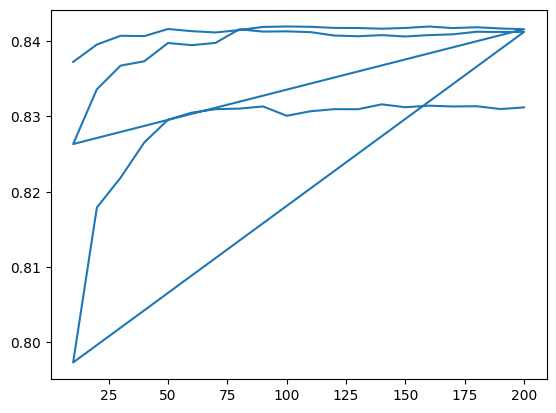

In [145]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.show()

In [137]:
scores = []

for d in [5, 10, 15]:
    for n in range (10, 201, 10):
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf_model.fit(X_train, y_train)

        rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, rf_pred_proba)

        scores.append((d, n, auc))

In [157]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head(5)

,max_depth,n_estimators,auc
0,1,10,0.837243
1,1,20,0.839548
2,1,30,0.840715
3,1,40,0.840673
4,1,50,0.841616


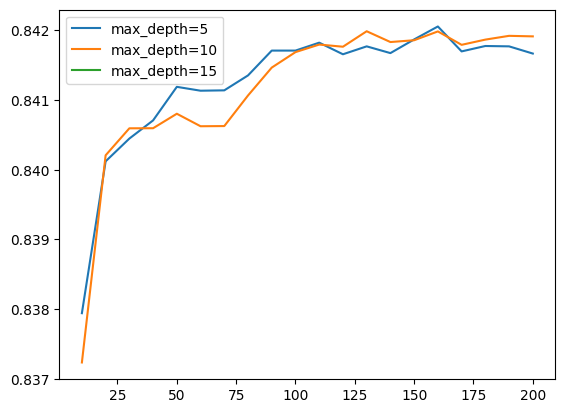

In [161]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' %d)
    
plt.legend()
plt.show()

In [163]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range (10, 201, 10):
        rf_model = RandomForestClassifier(n_estimators=n,
                                    max_depth=10,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf_model.fit(X_train, y_train)

        rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, rf_pred_proba)

        scores.append((s, n, auc))

In [165]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.826332
1,1,20,0.833611
2,1,30,0.836751
3,1,40,0.837330
4,1,50,0.839758


In [167]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

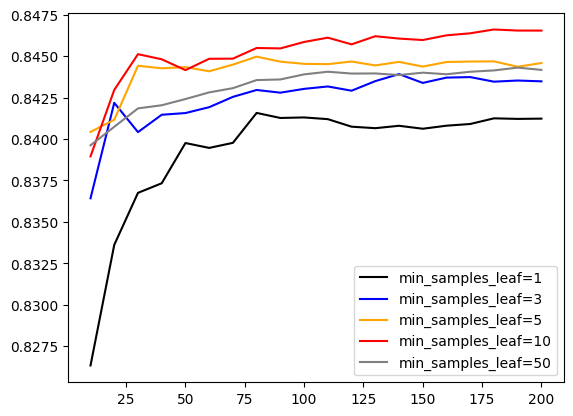

In [169]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in  zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
    
plt.legend()
plt.show()

In [171]:
#Final model
rf_model = RandomForestClassifier(n_estimators=180,
                            max_depth=10,
                            min_samples_leaf=10,
                            random_state=1,
                            n_jobs = -1)
rf_model.fit(X_train, y_train)

,n_estimators,180
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [173]:
#prediction
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [175]:
print(classification_report(y_test, rf_pred))
roc_auc_score(y_test, rf_pred_proba)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



0.8466118990415665

The parameter Tuning increased the model slightly.

### POSTDICTIVE ANALYSIS

What did the model get right, what did it miss, and why? Explaining model behaviour after predictions.

In [181]:
#identify these groups in code
results = X_test.copy()
results['actual_churn'] = y_test.values
results['predicted_churn'] = y_pred
results['churn_prob'] = y_pred_proba

In [183]:
false_negatives = results[
    (results.actual_churn == 1) & (results.predicted_churn == 0)
]

false_positives = results[
    (results.actual_churn == 0) & (results.predicted_churn == 1)
]

In [185]:
#Why did these customers churn even though the model thought they wouldn’t?
false_negatives[['tenure', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,182.000000,182.000000
mean,25.181319,67.275000
std,21.373683,28.807314
min,1.000000,18.950000
25%,4.000000,48.600000
50%,20.500000,70.125000
75%,40.000000,92.125000
max,72.000000,115.650000


**False Negative** = The customer **Did Churn**, but our model said they **wouldn not Churn**

- count=182 that means we missed 182 churners which matches our recall
- For **Tenure** we find out these are not brand new customers, many had been around 1-3 years and looked stable thats why the model trusted them.
- And **Monthly Charges** These customers were not extremely expensive, not super cheap either they were right in the “normal” zone. Nothing screamed about to churn

The big Insight
These customers:
- Had reasonable tenure
- Paid average prices
- Didn’t show classic churn signals

So the model thought: “This customer looks fine.” 
But reality said: “They still left.”

In [193]:
#Why did the model think they would churn, but they didn’t?
false_positives[['tenure', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,103.000000,103.000000
mean,12.417476,81.413592
std,13.512176,16.399426
min,1.000000,24.900000
25%,3.000000,73.975000
50%,7.000000,83.250000
75%,15.500000,93.775000
max,63.000000,111.400000


**False Positives** Model said “this customer will churn” But they actually stayed

- For **Tenure** these are new customers (mean=12months, median=7months, 25% of customers is less than or equal to 3 months) and from EDA, we already know:
- New customers churn the most
- Early lifecycle is high-risk

So the model saw: This customer hasn’t been around long and that might be risky

- For **Monthly Charges** These customers are:
* Paying above average
* Likely on premium plans

So high price + short tenure = classic churn profile

**Why Didn’t They Churn Then?**

Possible real-world reasons:
- Promotions or discounts
- High perceived value
- Bundled services
- Customer support interventions

None of these are in our dataset.

In [198]:
#churn probability
results.sort_values('churn_prob', ascending=False).head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,num_services,high_monthly_charge,long_term_contract,auto_payment,fiber_optic_user,gender_Male,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_12-24 months,tenure_group_24-48 months,tenure_group_48+ months,actual_churn,predicted_churn,churn_prob
3380,1,1,95.10,95.10,2,1,0,0,1,True,...,True,False,True,False,False,False,False,1,1,0.882376
6866,0,1,95.45,95.45,2,1,0,0,1,True,...,True,False,True,False,False,False,False,1,1,0.862200
6365,1,7,101.95,700.85,3,1,0,0,1,True,...,True,False,True,False,False,False,False,1,1,0.860175
6894,1,3,105.90,334.65,4,1,0,0,1,True,...,True,False,True,False,False,False,False,1,1,0.858475
2631,1,7,99.25,665.45,3,1,0,0,1,True,...,True,False,True,False,False,False,False,1,1,0.858370
2797,0,3,100.95,329.95,3,1,0,0,1,True,...,True,False,True,False,False,False,False,1,1,0.855045
3727,0,3,96.60,291.90,2,1,0,0,1,False,...,True,False,True,False,False,False,False,1,1,0.852016
4585,1,1,85.05,85.05,1,1,0,0,1,False,...,True,False,True,False,False,False,False,1,1,0.845575
3346,1,2,84.05,186.05,1,1,0,0,1,False,...,True,False,True,False,False,False,False,0,1,0.840337
4039,0,7,94.10,701.30,2,1,0,0,1,True,...,True,False,True,False,False,False,False,0,1,0.834188


Customers with the highest predicted churn probabilities are typically new, high-paying users on month-to-month contracts using electronic payment methods. These customers represent the most immediate retention opportunities.

### BUSINESS RECOMMENDATIONS

Key Insights & Recommendations
- Customers with short tenure (<12 months) and high monthly charges are the most likely to churn and should be prioritised for early retention efforts.

- Month-to-month contracts and electronic check payments are strong churn signals, suggesting that incentives for long-term contracts and auto-pay adoption could reduce churn.

- The model performs well at ranking churn risk (ROC-AUC ≈ 0.84), making churn probability a more useful tool than binary churn predictions for business decision-making.

- Missed churn cases (false negatives) are often driven by unobserved factors such as service quality or external competition, indicating the need for richer behavioral and customer interaction data.